In [1]:
# 这个 Notebook 只用于展示 v2 的结果，具体代码请到 trainv2-transformnet.py
import torch
import torch.nn.functional as F
import torch.optim as optim

import torchvision.models as tv_models

import numpy as np
from tqdm import tqdm

from model import VGG, TransformNet
from utility import gram_matrix, total_variance, ImageProcess

# verbose setting
debug = False
verbose_print = False
verbose_batch = 100

# test setting
test_num = 30

# image crop setting
uniform_h = 256
uniform_w = 256

# hyperparmaeter setting
iter_times = 1
dataset_size = 8000
batch_size = 4

style_weight = 1e5
content_weight = 1
totalVariation_weight = 1e-6
learning_rate = 1e-3

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
verbose_print = True

In [3]:
transform_net = TransformNet(32).to(device)
transform_net.load_state_dict(torch.load("./v2_transnet.pth"))

In [5]:
# 将 transform_net 设置为“演算”模式而不是“训练模式” —— 一些网络层在这两种模式中有不同的行为
transform_net.eval()

TransformNet(
  (downsampling): Sequential(
    (0): ReflectionPad2d((4, 4, 4, 4))
    (1): Conv2d(3, 32, kernel_size=(9, 9), stride=(1, 1))
    (2): InstanceNorm2d(32, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (3): ReLU()
    (4): ReflectionPad2d((1, 1, 1, 1))
    (5): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2))
    (6): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (7): ReLU()
    (8): ReflectionPad2d((1, 1, 1, 1))
    (9): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2))
    (10): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (11): ReLU()
  )
  (residuals): Sequential(
    (0): ResidualBlock(
      (conv): Sequential(
        (0): ReflectionPad2d((1, 1, 1, 1))
        (1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
        (2): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (3): ReLU()
        (4): Reflecti

content image shape: torch.Size([1, 3, 1024, 1618])


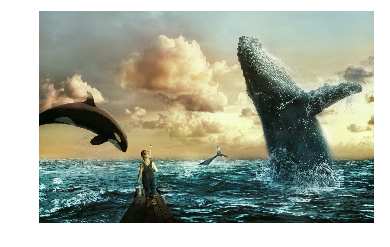

In [6]:
# load image to torchTensor
h = 1024
w = int(1.5807334428024082 * h) # 将宽和高按照比例重新缩放
content_img = ImageProcess.read_image("./image/content_img_v2.jpg", h, w).to(device)
print("content image shape:", content_img.shape)

# paint images
ImageProcess.paint_image(content_img,"content_image")

In [7]:
output_img = transform_net(content_img)

/opt/anaconda3/lib/python3.7/site-packages/torch/nn/modules/upsampling.py:129: UserWarning: nn.Upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.{} is deprecated. Use nn.functional.interpolate instead.".format(self.name))


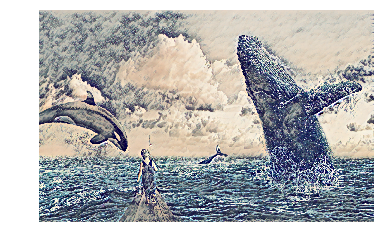

Successfully save the final stylized image to: ./image/output_img_v2.jpg


In [8]:
ImageProcess.paint_image(output_img, title='Output Image')
ImageProcess.save_image(output_img, "./image/output_img_v2.jpg")